# Initializers

In [1]:
import tensorflow as tf

dense_glorot_initializer = tf.keras.layers.Dense(50, activation="relu") # Glorot is the default
dense_he_initializer = tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal")

# Custom initializer (adjusting scale, fan mode and distribution)
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2.0, mode="fan_avg", distribution="uniform")
dense_custom_he_avg = tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer=he_avg_init)

2025-10-13 12:35:46.550964: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Better activation functions

In [2]:
# Leaky ReLU
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)
dense = tf.keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")

# It could be added as a separate layer. In this case, the layer is left with no activation function and the
# activation function goes as a layer.
model = tf.keras.models.Sequential([
    # more layers
    tf.keras.layers.Dense(50, kernel_initializer="he_normal"), # no activation
    tf.keras.layers.LeakyReLU(alpha=0.2), # activation as a separate layer
    # more layers
])

/home/julio/.local/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


# Batch normalization

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

/home/julio/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
W0000 00:00:1760369749.796833     734 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [5]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [6]:
# Batch normalization before the activation function
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [7]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 300)            │       235,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        30,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,810 (1.02 MB)

 Trainable params: 267,010 (1.02 MB)

 Non-trainable params: 800 (3.12 KB)

# Faster optimizers

In [8]:
# Momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [9]:
# Nesterov Accelerated Gradient (NAG)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [10]:
# RMSProp
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [11]:
# Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Learning rate scheduling

In [12]:
# power scheduling
optimize = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

/home/julio/.local/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [13]:
# exponential scheduling
def exponential_decay_fn(epoch):
    learning_rate = 0.01
    steps = 20
    return learning_rate * (0.1 ** (epoch // steps))

# the same but with eta0 (learning_rate) and s not hardcoded
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * (0.1 ** (epoch // s))
    return exponential_decay_fn


In [14]:
for i in range(0, 41):
    print("exponential_decay_fn({}) -> {}".format(i, exponential_decay_fn(i)))

exponential_decay_fn(0) -> 0.01
exponential_decay_fn(1) -> 0.01
exponential_decay_fn(2) -> 0.01
exponential_decay_fn(3) -> 0.01
exponential_decay_fn(4) -> 0.01
exponential_decay_fn(5) -> 0.01
exponential_decay_fn(6) -> 0.01
exponential_decay_fn(7) -> 0.01
exponential_decay_fn(8) -> 0.01
exponential_decay_fn(9) -> 0.01
exponential_decay_fn(10) -> 0.01
exponential_decay_fn(11) -> 0.01
exponential_decay_fn(12) -> 0.01
exponential_decay_fn(13) -> 0.01
exponential_decay_fn(14) -> 0.01
exponential_decay_fn(15) -> 0.01
exponential_decay_fn(16) -> 0.01
exponential_decay_fn(17) -> 0.01
exponential_decay_fn(18) -> 0.01
exponential_decay_fn(19) -> 0.01
exponential_decay_fn(20) -> 0.001
exponential_decay_fn(21) -> 0.001
exponential_decay_fn(22) -> 0.001
exponential_decay_fn(23) -> 0.001
exponential_decay_fn(24) -> 0.001
exponential_decay_fn(25) -> 0.001
exponential_decay_fn(26) -> 0.001
exponential_decay_fn(27) -> 0.001
exponential_decay_fn(28) -> 0.001
exponential_decay_fn(29) -> 0.001
exponentia

## Should be used in a callback

In [15]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
# history = model.fit(X_train, y_train, [...], callbacks=[lr_scheduler])

# Regularizing the model

## Dropout

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [17]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

# Monte Carlo (MC) Dropout

In [18]:
import numpy as np

# y_probas = np.stack([model(X_test, training=True)
#                      for sample in range(100)])
# y_proba = y_probas.mean(axis=0)

# Exercises

## 8

### a

In [20]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for i in range(20):
    model.add(tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))

### b

In [35]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [36]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [41]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [43]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y%m%d_%H%M%S")


run_logdir = get_run_logdir()

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("keras_models/cifar10_checkpoints.weights.h5", save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb]
)

2025-10-13 20:09:12.984599: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-10-13 20:09:12.984652: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
W0000 00:00:1760396952.989238     734 cupti_tracer.cc:1337] Fail to use per-thread activity buffer, cupti trace overhead may be big. CUPTI ERROR CODE:1
2025-10-13 20:09:12.989500: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:136] Profiler session tear down.
I0000 00:00:1760396952.989683     734 cupti_tracer.cc:1381] CUPTI activity buffer flushed


Epoch 1/100
 133/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3934 - loss: 1.6851

2025-10-13 20:09:13.720046: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-10-13 20:09:13.720081: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
W0000 00:00:1760396953.722086     734 cupti_tracer.cc:1337] Fail to use per-thread activity buffer, cupti trace overhead may be big. CUPTI ERROR CODE:1


 199/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3942 - loss: 1.6798

2025-10-13 20:09:14.223633: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
I0000 00:00:1760396954.251243     734 cupti_tracer.cc:1381] CUPTI activity buffer flushed
I0000 00:00:1760396954.327080     734 cupti_collector.cc:841]  GpuTracer has collected 0 callback api events and 0 activity events. 
I0000 00:00:1760396954.327209     734 cupti_collector.cc:844]  GpuTracer max callback_events: 2097152, max activity events: 2097152
2025-10-13 20:09:14.382463: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:136] Profiler session tear down.
2025-10-13 20:09:14.399056: I external/local_xla/xla/tsl/profiler/rpc/client/save_profile.cc:150] Collecting XSpace to repository: my_logs/run_20251013_200912/train/plugins/profile/2025_10_13_20_09_14/DESKTOP-4IJAQSI.xplane.pb


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3975 - loss: 1.6673 - val_accuracy: 0.3712 - val_loss: 1.7324
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4038 - loss: 1.6579 - val_accuracy: 0.3816 - val_loss: 1.7134
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4053 - loss: 1.6484 - val_accuracy: 0.3906 - val_loss: 1.7019
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4111 - loss: 1.6361 - val_accuracy: 0.3834 - val_loss: 1.6949
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4148 - loss: 1.6264 - val_accuracy: 0.4154 - val_loss: 1.6409
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4196 - loss: 1.6188 - val_accuracy: 0.4032 - val_loss: 1.6684
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4275 - loss: 1.6084 - val_accuracy: 0.4074 - val_loss: 1.6654
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4230 - loss: 1.6077 - val_

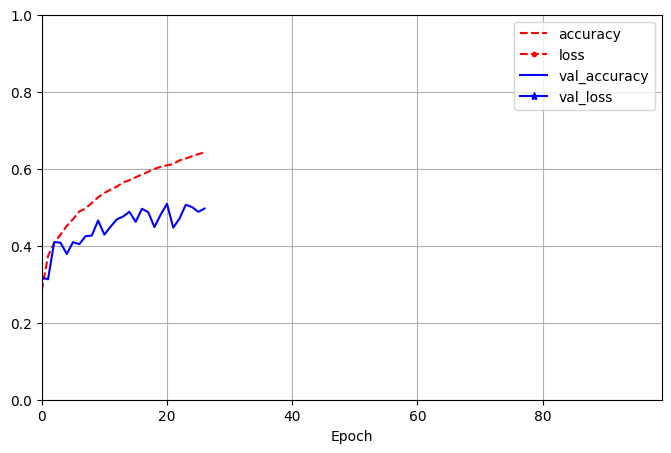

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# xlim: 0-29 -> there are 30 epochs
# ylim: 0-1 -> just because the values ranges from 0 to 1
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [48]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4290 - loss: 1.6135


[1.61354660987854, 0.42899999022483826]

### c

In [51]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for i in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))
    
model.add(tf.keras.layers.Dense(10, activation="softmax"))

/home/julio/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [53]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("keras_models/cifar10_checkpoints.weights.h5", save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb]
)

2025-10-13 20:18:24.024387: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-10-13 20:18:24.024433: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
W0000 00:00:1760397504.029435     734 cupti_tracer.cc:1337] Fail to use per-thread activity buffer, cupti trace overhead may be big. CUPTI ERROR CODE:1
2025-10-13 20:18:24.029658: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:136] Profiler session tear down.
I0000 00:00:1760397504.029813     734 cupti_tracer.cc:1381] CUPTI activity buffer flushed


Epoch 1/100
 118/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1155 - loss: 2.3929

2025-10-13 20:18:30.173946: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-10-13 20:18:30.173982: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
W0000 00:00:1760397510.175736     734 cupti_tracer.cc:1337] Fail to use per-thread activity buffer, cupti trace overhead may be big. CUPTI ERROR CODE:1


 196/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.1276 - loss: 2.3551

2025-10-13 20:18:31.120849: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
I0000 00:00:1760397511.179497     734 cupti_tracer.cc:1381] CUPTI activity buffer flushed
I0000 00:00:1760397511.295431     734 cupti_collector.cc:841]  GpuTracer has collected 0 callback api events and 0 activity events. 
I0000 00:00:1760397511.295545     734 cupti_collector.cc:844]  GpuTracer max callback_events: 2097152, max activity events: 2097152


 214/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.1302 - loss: 2.3477

2025-10-13 20:18:31.377491: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:136] Profiler session tear down.
2025-10-13 20:18:31.382935: I external/local_xla/xla/tsl/profiler/rpc/client/save_profile.cc:150] Collecting XSpace to repository: my_logs/run_20251013_200912/train/plugins/profile/2025_10_13_20_18_31/DESKTOP-4IJAQSI.xplane.pb


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.2828 - loss: 1.9705 - val_accuracy: 0.3182 - val_loss: 1.9325
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3730 - loss: 1.7489 - val_accuracy: 0.3126 - val_loss: 1.8662
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4078 - loss: 1.6649 - val_accuracy: 0.4094 - val_loss: 1.6801
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4287 - loss: 1.6053 - val_accuracy: 0.4078 - val_loss: 1.6423
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4516 - loss: 1.5455 - val_accuracy: 0.3786 - val_loss: 1.7702
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4690 - loss: 1.5003 - val_accuracy: 0.4092 - val_loss: 1.6885
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4888 - loss: 1.4519 - val_accuracy: 0.4040 - val_loss: 1.6968
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4970 - loss: 1.4144 - val

In [54]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4960 - loss: 1.4497


[1.4497311115264893, 0.4959999918937683]

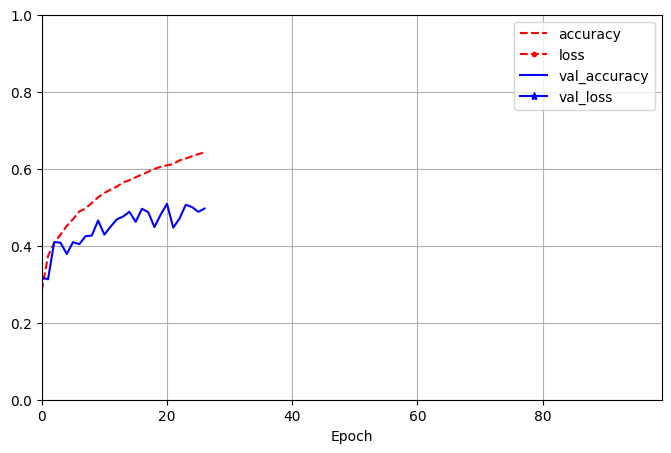

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# xlim: 0-29 -> there are 30 epochs
# ylim: 0-1 -> just because the values ranges from 0 to 1
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.show()